In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


['Feb 15', 'Feb 16', 'Feb 17', 'Feb 18', 'Feb 19', 'Feb 20', 'Feb 21', 'Feb 22', 'Feb 23', 'Feb 24', 'Feb 25', 'Feb 26', 'Feb 27', 'Feb 28', 'Feb 29', 'Mar 01', 'Mar 02', 'Mar 03', 'Mar 04', 'Mar 05', 'Mar 06', 'Mar 07', 'Mar 08', 'Mar 09', 'Mar 10', 'Mar 11', 'Mar 12', 'Mar 13', 'Mar 14', 'Mar 15', 'Mar 16', 'Mar 17', 'Mar 18', 'Mar 19', 'Mar 20', 'Mar 21', 'Mar 22', 'Mar 23', 'Mar 24', 'Mar 25', 'Mar 26', 'Mar 27', 'Mar 28', 'Mar 29', 'Mar 30', 'Mar 31', 'Apr 01', 'Apr 02', 'Apr 03', 'Apr 04', 'Apr 05', 'Apr 06', 'Apr 07', 'Apr 08', 'Apr 09', 'Apr 10', 'Apr 11', 'Apr 12', 'Apr 13', 'Apr 14', 'Apr 15', 'Apr 16', 'Apr 17', 'Apr 18', 'Apr 19', 'Apr 20', 'Apr 21', 'Apr 22', 'Apr 23', 'Apr 24', 'Apr 25', 'Apr 26', 'Apr 27', 'Apr 28', 'Apr 29', 'Apr 30', 'May 01', 'May 02', 'May 03', 'May 04', 'May 05', 'May 06', 'May 07', 'May 08', 'May 09', 'May 10', 'May 11', 'May 12', 'May 13', 'May 14', 'May 15', 'May 16', 'May 17', 'May 18', 'May 19', 'May 20', 'May 21', 'May 22', 'May 23', 'May 24',

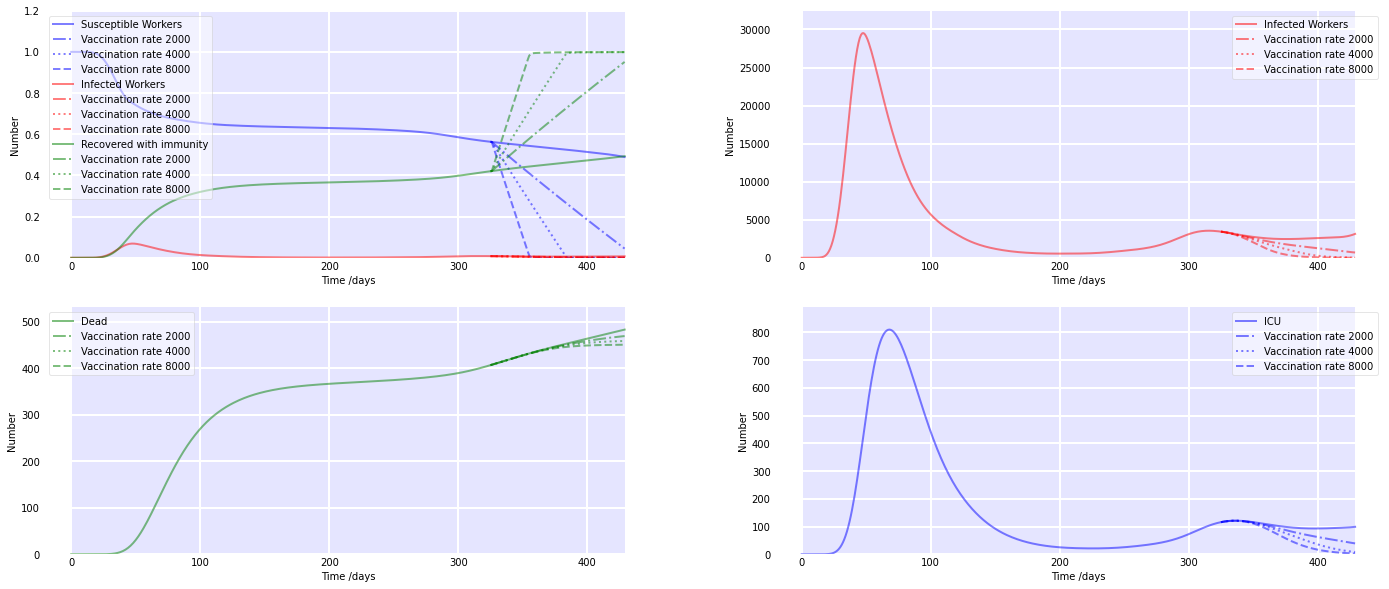

statistics of Feb 20 is: 
susceptible: 427384
exposed: 0
carrier: 0
infected: 0
hospitalized: 0
ICU: 1
recovered: 0
dead: 0
percentage of Health Workers Exposed : 0.00

 -------------------- 

statistics of Apr 26 is: 
susceptible: 293368
exposed: 735
carrier: 6094
infected: 16123
hospitalized: 3410
ICU: 804
recovered: 106710
dead: 138
percentage of Health Workers Exposed : 31.36

 -------------------- 

statistics of May 19 is: 
susceptible: 282100
exposed: 372
carrier: 2676
infected: 6947
hospitalized: 1822
ICU: 524
recovered: 132692
dead: 249
percentage of Health Workers Exposed : 33.99

 -------------------- 

statistics of Jul 29 is: 
susceptible: 271487
exposed: 58
carrier: 384
infected: 796
hospitalized: 195
ICU: 58
recovered: 154046
dead: 357
percentage of Health Workers Exposed : 36.48

 -------------------- 

statistics of Aug 23 is: 
susceptible: 270053
exposed: 59
carrier: 353
infected: 559
hospitalized: 111
ICU: 31
recovered: 155852
dead: 364
percentage of Health Workers E

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import pandas as pd


#data loading
mainPath =r'drive/My Drive/SECIRH/Dataset/Hospitalized_Cases_Iran.xlsx'
df = pd.read_excel(mainPath, index_col=0)  
H = df['Hospitalized cases Iran'].tolist()
D = df['Date'].tolist()

#data prepration  
Modified_dates = []

for i in D:
  Modified_dates.append(i[:i.find(",")])

print(Modified_dates)
dates = []
startP = 0
j = 0
for i in Modified_dates:
  if i != 'Dec 08':
    dates.append(i)
    j += 1
  else:
    dates.append(i)
    startP = j
    print(startP)
print(len(dates))
data = []
for i in range(len(dates)):
  data.append(H[i])
print(len(data))





# Initial number value of model
Hw0, Eh0, Ch0, Ih0, Hh0, Uh0, Dh0, Rh0, Wi0, We0 = 427385, 0, 0, 0, 0, 0, 0, 0, 0,0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
R1, R3, R4, R5, R6, R7, R8 = 0.3, 1/4.2, 1/14, 1/16, 1/5, 1/3.5, 1/8
R2 = 1/(5.2-1/R3) 
R9 = 1/(1/R3+0.5/R4) 
d, p, v, alpha, beta, delta= 1/6.92, 0.0692, 0.09925, 0.5, 0.75, 0.049
# A grid of time points (in days)
t = np.linspace(0, int(len(data)-1), int(len(data)))







# The SECIRH model differential equations.
def deriv(y, t, R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax):
    

    # Function get time and give protection rate
    def getRate(t):
      if int(t)<=15:
        return 1
      if int(t) <=45:
        return -(int(t)-15)*9/300+1
      else:
        return 0.1

    Hw, Eh, Ch, Ih, Hh, Uh, Dh, Rh, Wi, We = y
    rate = getRate(t)
    if math.floor(t) == t:
      H = data[int(t)]
    else:
      if math.ceil(t) < len(data):
        H = (data[int(math.floor(t))] + (data[int(math.ceil(t))] - data[int(math.floor(t))]) * (t - math.floor(t)))
      else:
        H = (data[int(len(data)-1)])
    
    VR = 0
    #VRmax = 8000
    if math.floor(t) > 325:
      if Hw > VRmax:
        VR = VRmax
      else:
        VR = Hw

    dHwdt = -rate*R1*(Ch + beta * (H + Hh) + Ih) * Hw/Hw0 - VR
    dEhdt =  rate*R1*(Ch + beta * (H + Hh) + Ih) * Hw/Hw0 - R2 * Eh
    dChdt =  R2 * Eh -((1-alpha)*R3+alpha*R9)*Ch
    dIhdt =  (1-alpha)*R3 * Ch - ((1-p)*R4+p*R6) * Ih
    dHhdt = p * R6 * Ih - ((1 - v) * R5 + v * R7) * Hh
    dUhdt =  v * R7 * Hh - ((1-delta)*R8+delta*d)*Uh
    dRhdt = alpha*R9*Ch+(1-p)*R4*Ih+(1-v)*R5*Hh+(1-delta)*R8*Uh + VR
    dDhdt = delta*d*Uh
    dWidt = (1-alpha)*R3 * Ch
    dWedt = rate*R1*(Ch + beta * (H + Hh) + Ih) * Hw/Hw0
    return  dHwdt, dEhdt, dChdt, dIhdt, dHhdt, dUhdt, dDhdt, dRhdt, dWidt, dWedt

# Initial conditions vector
VRmax = 0
y0 =  Hw0, Eh0, Ch0, Ih0, Hh0, Uh0, Dh0, Rh0, Wi0, We0
# Integrate the SECIRH equations with diffrent rate of vaccination over the time grid, t.
ret = odeint(deriv, y0, t, args=(R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax))
Hw, Eh, Ch, Ih, Hh, Uh, Dh, Rh, Wi, We = ret.T

VRmax = 2000
ret = odeint(deriv, y0, t, args=(R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax))
Hw2, Eh2, Ch2, Ih2, Hh2, Uh2, Dh2, Rh2, Wi2, We2 = ret.T

VRmax = 4000
ret = odeint(deriv, y0, t, args=(R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax))
Hw4, Eh4, Ch4, Ih4, Hh4, Uh4, Dh4, Rh4, Wi4, We4 = ret.T

VRmax = 6000
ret = odeint(deriv, y0, t, args=(R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax))
Hw6, Eh6, Ch6, Ih6, Hh6, Uh6, Dh6, Rh6, Wi6, We6 = ret.T

VRmax = 8000
ret = odeint(deriv, y0, t, args=(R1, R2, R3, R4, R5, R6, R7, R8, R9, d, p, v, alpha, beta, delta,data,dates,VRmax))
Hw8, Eh8, Ch8, Ih8, Hh8, Uh8, Dh8, Rh8, Wi8, We8 = ret.T

#vaccination data prepration
for i in range(325):
  Hw2[i], Eh2[i], Ch2[i], Ih2[i], Hh2[i], Uh2[i], Dh2[i], Rh2[i], Wi2[i], We2[i] = (np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN)
  Hw4[i], Eh4[i], Ch4[i], Ih4[i], Hh4[i], Uh4[i], Dh4[i], Rh4[i], Wi4[i], We4[i] = (np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN)
  Hw6[i], Eh6[i], Ch6[i], Ih6[i], Hh6[i], Uh6[i], Dh6[i], Rh6[i], Wi6[i], We6[i] = (np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN)
  Hw8[i], Eh8[i], Ch8[i], Ih8[i], Hh8[i], Uh8[i], Dh8[i], Rh8[i], Wi8[i], We8[i] = (np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN)

newsDates = ["Apr 26", "May 19","Jul 29", "Aug 23", "Nov 07", "Nov 25", "Dec 16", "Dec 17", "Dec 19", "Dec 20"]
indexNumNews = []
impoDates = []
newsCounter = 0
flag = 0
for i in range(len(dates)):
  if flag == 0:
    if data[i]>0:
      indexNumNews.append(i)
      impoDates.append(dates[i])
      flag = 1
  if newsDates[newsCounter] == dates[i]:
    indexNumNews.append(i)
    impoDates.append(dates[i])
    newsCounter += 1
    if newsCounter == len(newsDates):
      break

print(indexNumNews)
#plotting
#fig = plt.figure(facecolor='w')
fig, axs = plt.subplots(2, 2, figsize=(24, 10))
ax = axs[0, 0]
#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.grid()
ax.plot(t, Hw/Hw0, 'b', alpha=0.5, lw=2, label='Susceptible Workers')
ax.plot(t, Hw2/Hw0, 'b', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Hw4/Hw0, 'b', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Hw6/Hw0, 'b', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Hw8/Hw0, 'b', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')
ax.plot(t, Ih/Hw0, 'r', alpha=0.5, lw=2, label='Infected Workers')
ax.plot(t, Ih2/Hw0, 'r', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Ih4/Hw0, 'r', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Ih6/Hw0, 'r', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Ih8/Hw0, 'r', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')
ax.plot(t, Rh/Hw0, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, Rh2/Hw0, 'g', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Rh4/Hw0, 'g', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Rh6/Hw0, 'g', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Rh8/Hw0, 'g', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')



colors =['y','k','k','m','m', 'c','c','y','m','c','k']
lineStyles = ['-.','-','-','-','-','-','-','-','-.','--',':']

'''
counter = 0
#news timing
for xc,c,impoDate,lineStyle in zip(indexNumNews,colors,impoDates,lineStyles):
  if counter == 0:
    counter +=1
    ax.axvline(x=xc, label='Outbreak start  {}'.format(impoDate), c=c, linestyle=lineStyle)
  ax.axvline(x=xc, label='{}'.format(impoDate), c=c, linestyle=lineStyle)
'''


ax.fill_between(t, 0, 1.2, alpha = 0.1, facecolor = 'b')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


ax = axs[0, 1]
import math
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Ih, 'r', alpha=0.5, lw=2, label='Infected Workers')
ax.plot(t, Ih2, 'r', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Ih4, 'r', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Ih6, 'r', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Ih8, 'r', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')

colors =['y','k','k','m','m', 'c','c','y','m','c','k']
lineStyles = ['-.','-','-','-','-','-','-','-','-.','--',':']
counter = 0
'''
#news timing
for xc,c,impoDate,lineStyle in zip(indexNumNews,colors,impoDates,lineStyles):
  if counter == 0:
    counter +=1
    ax.axvline(x=xc, label='Outbreak start  {}'.format(impoDate), c=c, linestyle=lineStyle)
  ax.axvline(x=xc, label='{}'.format(impoDate), c=c, linestyle=lineStyle)
'''

ax.fill_between(t, 0, Ih.max()*1.1, alpha = 0.1, facecolor = 'b')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0,Ih.max()*1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)



ax = axs[1, 0]
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Dh, 'g', alpha=0.5, lw=2, label='Dead')
ax.plot(t, Dh2, 'g', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Dh4, 'g', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Dh6, 'g', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Dh8, 'g', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')

colors =['y','k','k','m','m', 'c','c','y','m','c','k']
lineStyles = ['-.','-','-','-','-','-','-','-','-.','--',':']
counter = 0
'''
#news timing
for xc,c,impoDate,lineStyle in zip(indexNumNews,colors,impoDates,lineStyles):
  if counter == 0:
    counter +=1
    ax.axvline(x=xc, label='Outbreak start  {}'.format(impoDate), c=c, linestyle=lineStyle)
  ax.axvline(x=xc, label='{}'.format(impoDate), c=c, linestyle=lineStyle)

'''
ax.fill_between(t, 0, math.floor(Dh[-1])*1.1, alpha = 0.1, facecolor = 'b')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0,math.floor(Dh[-1])*1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)


ax = axs[1, 1]
#fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Uh, 'b', alpha=0.5, lw=2, label='ICU')
ax.plot(t, Uh2, 'b', alpha=0.5, lw=2,linestyle='-.', label='Vaccination rate 2000')
ax.plot(t, Uh4, 'b', alpha=0.5, lw=2,linestyle=':', label='Vaccination rate 4000')
#ax.plot(t, Uh6, 'b', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 6000')
ax.plot(t, Uh8, 'b', alpha=0.5, lw=2,linestyle='--', label='Vaccination rate 8000')

colors =['y','k','k','m','m', 'c','c','y','m','c','k']
lineStyles = ['-.','-','-','-','-','-','-','-','-.','--',':']
counter = 0
'''
#news timing
for xc,c,impoDate,lineStyle in zip(indexNumNews,colors,impoDates,lineStyles):
  if counter == 0:
    counter +=1
    ax.axvline(x=xc, label='Outbreak start  {}'.format(impoDate), c=c, linestyle=lineStyle)
  ax.axvline(x=xc, label='{}'.format(impoDate), c=c, linestyle=lineStyle)
'''

ax.fill_between(t, 0, math.floor(Uh.max()*1.1), alpha = 0.1, facecolor = 'b')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number')
ax.set_ylim(0,math.floor(Uh.max()*1.1))
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


#extracting some data from generated data in order to comprare with news data
for i in range(len(impoDates)):
  print("statistics of "+impoDates[i]+" is: ")
  print("susceptible: "+ str(math.floor(Hw[indexNumNews[i]])))
  print("exposed: "+ str(math.floor(Eh[indexNumNews[i]])))
  print("carrier: "+ str(math.floor(Ch[indexNumNews[i]])))
  print("infected: "+ str(math.floor(Ih[indexNumNews[i]])))
  print("hospitalized: "+ str(math.floor(Hh[indexNumNews[i]])))
  print("ICU: "+ str(math.ceil(Uh[indexNumNews[i]])))
  print("recovered: "+ str(math.floor(Rh[indexNumNews[i]])))
  print("dead: "+ str(math.floor(Dh[indexNumNews[i]])))
  print("percentage of Health Workers Exposed : {:.2f}".format(We[indexNumNews[i]]/Hw0*100))
  print("\n -------------------- \n")

print("statistics of "+dates[-1]+" is: ")
print("susceptible: "+ str(math.floor(Hw[indexNumNews[i]])))
print("exposed: "+ str(math.floor(Eh[indexNumNews[i]])))
print("carrier: "+ str(math.floor(Ch[indexNumNews[i]])))
print("infected: "+ str(math.floor(Ih[indexNumNews[i]])))
print("hospitalized: "+ str(math.floor(Hh[indexNumNews[i]])))
print("ICU: "+ str(math.ceil(Uh[indexNumNews[i]])))
print("recovered: "+ str(math.floor(Rh[indexNumNews[i]])))
print("dead: "+ str(math.floor(Dh[indexNumNews[i]])))
print("percentage of Health Workers Exposed : {:.2f}".format(We[indexNumNews[i]]/Hw0*100))
print("\n -------------------- \n")

for i in range(14):
  num = math.ceil(Wi[indexNumNews[5]-7+i]) - math.ceil(Wi[indexNumNews[5]-7+i - 1])
  print(dates[indexNumNews[5]-7+i]+" is:"+ str(num))




In [ ]:
d = 5
rateVacc = [0,2000,4000,8000]
for i in range(4):
  print('Data vcc='+str(rateVacc[i]))
  if i == 0:
    print("suspectile percent:"+str(Hw[tma]/Hw0*100)+"%")
    print("Infected:"+str(math.floor(Ih[tma])))
    print("death:"+str((Dh[tma]-Dh[tma-d])/(d+1)))
    print("ICU:"+str(math.floor(Uh[tma])))
  if i == 1:
    print("suspectile percent:"+str(Hw2[tma]/Hw0*100)+"%")
    print("Infected:"+str(math.floor(Ih2[tma])))
    print("death:"+str((Dh2[tma]-Dh2[tma-d])/(d+1)))
    print("ICU:"+str(math.floor(Uh2[tma])))
  if i == 2:
    print("suspectile percent:"+str(Hw4[tma]/Hw0*100)+"%")
    print("Infected:"+str(math.floor(Ih4[tma])))
    print("death:"+str((Dh4[tma]-Dh4[tma-d])/(d+1)))
    print("ICU:"+str(math.floor(Uh4[tma])))
  if i == 3:
    print("suspectile percent:"+str(Hw8[tma]/Hw0*100)+"%")
    print("Infected:"+str(math.floor(Ih8[tma])))
    print("death:"+str((Dh8[tma]-Dh8[tma-d])/(d+1)))
    print("ICU:"+str(math.floor(Uh8[tma])))

  print()
  print()

Data vcc=0
suspectile percent:54.02911412609641%
Infected:2561
death:0.6524998954260184
ICU:108


Data vcc=2000
suspectile percent:38.45370191413113%
Infected:2200
death:0.6333084670512031
ICU:104


Data vcc=4000
suspectile percent:22.86153845188485%
Infected:1855
death:0.6145404217670792
ICU:100


Data vcc=8000
suspectile percent:0.007762540079197203%
Infected:1221
death:0.5782326592631174
ICU:92


